In [94]:
from tensorflow import keras
keras.__version__

'2.5.0'

In [95]:
import pandas as pd
import numpy as np

diab_data = pd.read_csv("diabetes.csv")

diab_features = diab_data.copy()
diab_labels = diab_features.pop('Outcome')

diab_features = np.array(diab_features)

train_data, train_labels = diab_features[:500], diab_labels[:500]
validation_data, validation_labels = diab_features[500:600], diab_labels[500:600]
test_data, test_labels = diab_features[600:], diab_labels[600:]

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

train_labels = np.asarray(train_labels).astype('float32')
validation_labels = np.asarray(validation_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')


In [96]:
from tensorflow.keras.layers.experimental import preprocessing

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

normalize = preprocessing.Normalization()
normalize.adapt(diab_features)

model = models.Sequential()
#model.add(normalize)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#model= tf.keras.Sequential([
#    normalize,
#    layers.Dense(16, activation='relu'),
#    layers.Dense(16, activation='relu'),
#    layers.Dense(1, activation='sigmoid'),
#])

from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(train_data,
                    train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_data=(validation_data, validation_labels))

Epoch 1/30
32/32 [==============================] - 1s 6ms/step - loss: 0.6187 - binary_accuracy: 0.6900 - val_loss: 0.5019 - val_binary_accuracy: 0.8300
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5365 - binary_accuracy: 0.7440 - val_loss: 0.4385 - val_binary_accuracy: 0.8500
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.5056 - binary_accuracy: 0.7560 - val_loss: 0.4143 - val_binary_accuracy: 0.8700
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4884 - binary_accuracy: 0.7720 - val_loss: 0.3985 - val_binary_accuracy: 0.8500
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4815 - binary_accuracy: 0.7620 - val_loss: 0.3895 - val_binary_accuracy: 0.8600
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4759 - binary_accuracy: 0.7660 - val_loss: 0.3837 - val_binary_accuracy: 0.8600
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.46

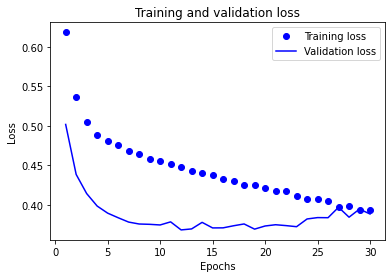

In [97]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

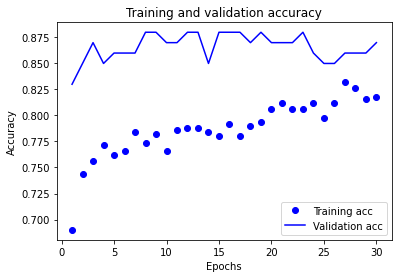

In [98]:
plt.clf()   # clear figure
history_dict = history.history
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [99]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=15, batch_size=16)
results = model.evaluate(test_data, test_labels)

Epoch 1/15
32/32 [==============================] - 1s 2ms/step - loss: 0.6109 - accuracy: 0.6760
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7420
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7620
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7700
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7680
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7640
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7760
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7740
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7700
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.7800
Epoch 11/15
32/32 [